$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## SEED value

In [2]:
SEED = 907


## `+` Load & Preprocess MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


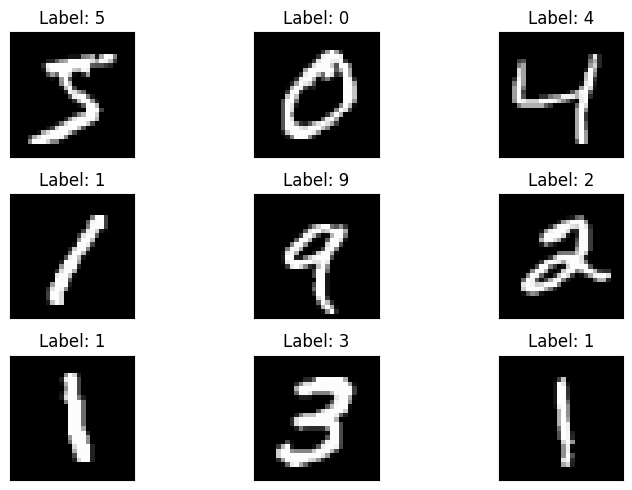

In [5]:
# see sample from the training dataset
plt.figure(figsize=(10,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i] , cmap = "gray")
  plt.title(f"Label: {y_train[i]}")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.tight_layout()

### Apply preprocessing and splitting the data

In [6]:
# normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
# Apply one hot encoding to y
y_train = to_categorical(y_train , num_classes=10)
y_test = to_categorical(y_test , num_classes=10)

In [8]:
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size=0.2 , random_state=907)

In [9]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)


## `+` Set Global Parameters

In [10]:
BATCH_SIZE  = 64
EPOCHS      = 50

## `i` Model Design

In [30]:
model = Sequential()
model.add(LSTM(32 , recurrent_dropout=0.15 ,  input_shape=(28,28)))     # 32 >> number of unit >> number of brains More units → More capacity to learn complex patterns, but also more computation and risk of overfitting.input_shape=(28,28) >>> time steps and features
model.add(Dense(64 , activation="relu"))
model.add(Dense(10 , activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,570 (41.29 KB)

 Trainable params: 10,570 (41.29 KB)

 Non-trainable params: 0 (0.00 B)

## `ii` Model Compilation & Training

In [11]:
early_stopping = EarlyStopping(monitor="val_loss" , patience=5 , restore_best_weights=True)

In [32]:
model.compile(loss="categorical_crossentropy" , optimizer=Adam() , metrics=["accuracy"])

In [33]:
history = model.fit(
    x_train , y_train ,
    validation_data=(x_val , y_val) ,
    batch_size=BATCH_SIZE ,
    epochs=EPOCHS ,
    callbacks=[early_stopping]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.4642 - loss: 1.5251 - val_accuracy: 0.8454 - val_loss: 0.4520
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8348 - loss: 0.5000 - val_accuracy: 0.9277 - val_loss: 0.2301
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9032 - loss: 0.3075 - val_accuracy: 0.9469 - val_loss: 0.1679
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9291 - loss: 0.2316 - val_accuracy: 0.9540 - val_loss: 0.1463
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9396 - loss: 0.1904 - val_accuracy: 0.9630 - val_loss: 0.1183
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9499 - loss: 0.1625 - val_accuracy: 0.9690 - val_loss: 0.0994
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9549 - loss: 0.1455 - val_accuracy: 0.9708 - val_loss: 0.0957
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9617 - loss: 0.1267 - 

In [34]:
model.save("pure-lstm-model.h5")

## `iii` Model Evaluation

In [42]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9812 - loss: 0.0638
test loss, test acc: [0.05043167993426323, 0.9848999977111816]


## `iv` Result Visualization

Text(0, 0.5, 'Loss')

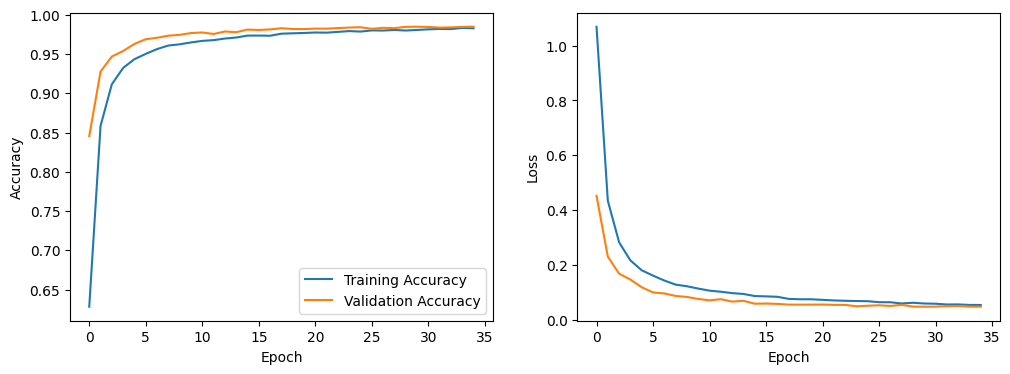

In [41]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


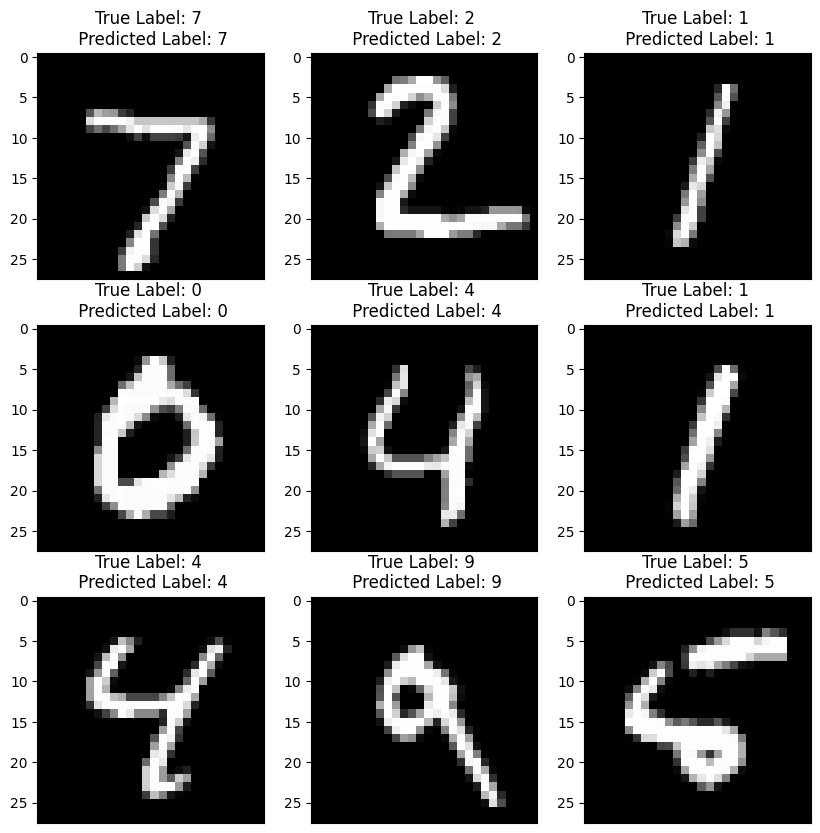

In [43]:
# Plot the Input, True Label, and Predicted Label
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i] , cmap = "gray")
  plt.title(f"True Label: {np.argmax(y_test[i])} \n Predicted Label: {np.argmax(model.predict(x_test[i].reshape(1,28,28)))}")
  plt.xticks([])

In [12]:
# making a more complex model > adding a second LSTM layer before the dense layer(s).Change the number of cells to $48, 96, 256$ and report the accuracy curve
model = Sequential()
# if we will add more than one lstm we should make return_sequences=True
model.add(LSTM(48 , return_sequences=True , recurrent_dropout=0.15 ,  input_shape=(28,28)))     # 32 >> number of unit >> number of brains More units → More capacity to learn complex patterns, but also more computation and risk of overfitting.input_shape=(28,28) >>> time steps and features
model.add(LSTM(96 , return_sequences=True ,  recurrent_dropout=0.15))
model.add(LSTM(256 , recurrent_dropout=0.15 ))

model.add(Dense(64 , activation="relu"))
model.add(Dense(10 , activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 28, 48)         │        14,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 28, 96)         │        55,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 256)            │       361,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449,034 (1.71 MB)

 Trainable params: 449,034 (1.71 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss="categorical_crossentropy" , optimizer=Adam() , metrics=["accuracy"])

In [14]:
history = model.fit(
    x_train , y_train ,
    validation_data=(x_val , y_val) ,
    batch_size=BATCH_SIZE ,
    epochs=EPOCHS ,
    callbacks=[early_stopping]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 246s 317ms/step - accuracy: 0.6739 - loss: 0.9342 - val_accuracy: 0.9434 - val_loss: 0.1810
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 261s 317ms/step - accuracy: 0.9446 - loss: 0.1782 - val_accuracy: 0.9641 - val_loss: 0.1125
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 236s 314ms/step - accuracy: 0.9661 - loss: 0.1077 - val_accuracy: 0.9743 - val_loss: 0.0860
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 264s 316ms/step - accuracy: 0.9749 - loss: 0.0800 - val_accuracy: 0.9807 - val_loss: 0.0644
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 239s 318ms/step - accuracy: 0.9796 - loss: 0.0674 - val_accuracy: 0.9808 - val_loss: 0.0622
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 233s 311ms/step - accuracy: 0.9820 - loss: 0.0563 - val_accuracy: 0.9862 - val_loss: 0.0458
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 265s 315ms/step - accuracy: 0.9841 - loss: 0.0491 - val_accuracy: 0.9861 - val_loss: 0.0492
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 264s 318ms/step - accuracy: 0.9870 -

In [15]:
model.save("complex-lstm-model.h5")

In [16]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9858 - loss: 0.0484


[0.04051239416003227, 0.9886000156402588]

Text(0, 0.5, 'Loss')

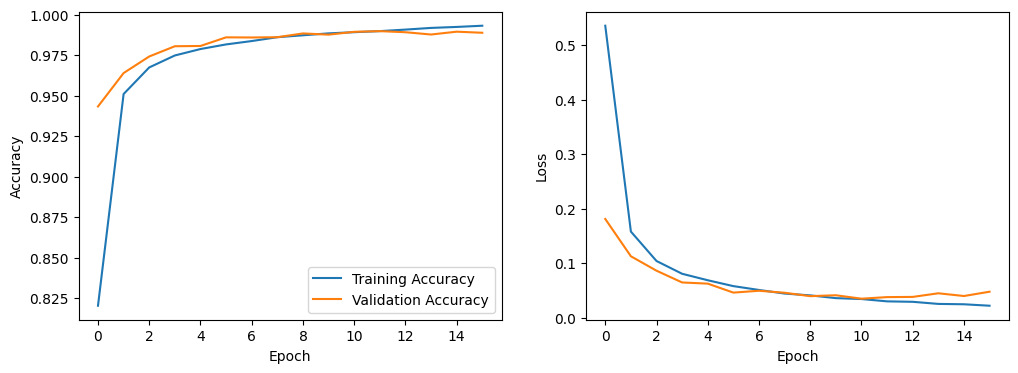

In [17]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


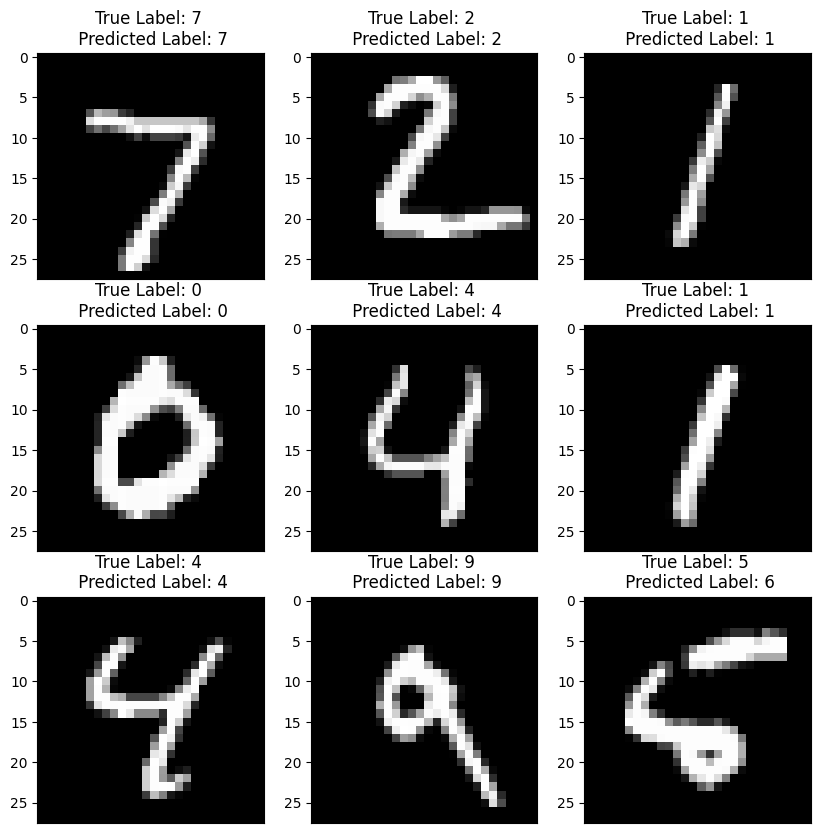

In [18]:
# Plot the Input, True Label, and Predicted Label
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i] , cmap = "gray")
  plt.title(f"True Label: {np.argmax(y_test[i])} \n Predicted Label: {np.argmax(model.predict(x_test[i].reshape(1,28,28)))}")
  plt.xticks([])

## this is a simple task so i recommend to use the first simple model we did >> and the second model >>> has a misclassified image (the last one)

**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

------------------------------

# Assignment 02
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)


IMPORTANT NOTE: Make sure to organize your solution, add proper documentation, and report your insights.
------------------------------

In [38]:
SEED = 907

(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


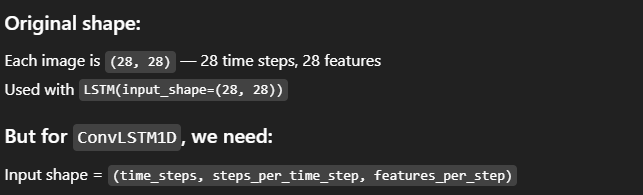

In [ ]:
# we will make reshape to  >>> (28,28,1)

In [39]:
# normalize the inputs
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [40]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
x_train , x_valid , y_train , y_valid = train_test_split(x_train , y_train , test_size=0.2 , random_state=907)

In [42]:
x_train.shape , x_valid.shape , y_train.shape , y_valid.shape

((48000, 28, 28), (12000, 28, 28), (48000, 10), (12000, 10))

In [43]:
from tensorflow.keras.layers import ConvLSTM1D , Reshape , Flatten

In [18]:
from warnings import filters
# Build the model

model = Sequential()

model.add(Reshape((28,28,1) , input_shape = (28,28)))

model.add(ConvLSTM1D(
    filters=32,
    kernel_size=1,
    padding='same',
    return_sequences=False,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(64 , activation = "relu"))
model.add(Dense(10 , activation = "softmax"))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d (ConvLSTM1D)        │ (None, 28, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,410 (243.79 KB)

 Trainable params: 62,410 (243.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [21]:
early_stopping = EarlyStopping(monitor="val_loss" , patience=5 , restore_best_weights=True)

In [22]:
history  = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.6295 - loss: 1.1085 - val_accuracy: 0.9100 - val_loss: 0.2736
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9060 - loss: 0.2887 - val_accuracy: 0.9466 - val_loss: 0.1693
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9344 - loss: 0.2039 - val_accuracy: 0.9480 - val_loss: 0.1616
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9481 - loss: 0.1616 - val_accuracy: 0.9571 - val_loss: 0.1282
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9584 - loss: 0.1314 - val_accuracy: 0.9651 - val_loss: 0.1138
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9648 - loss: 0.1112 - val_accuracy: 0.9703 - val_loss: 0.0939
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9675 - loss: 0.1009 - val_accuracy: 0.9696 - val_loss: 0.0947
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9719 - loss: 0.0888 - 

In [23]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9778 - loss: 0.0822


[0.06495893746614456, 0.9822999835014343]

Text(0, 0.5, 'Loss')

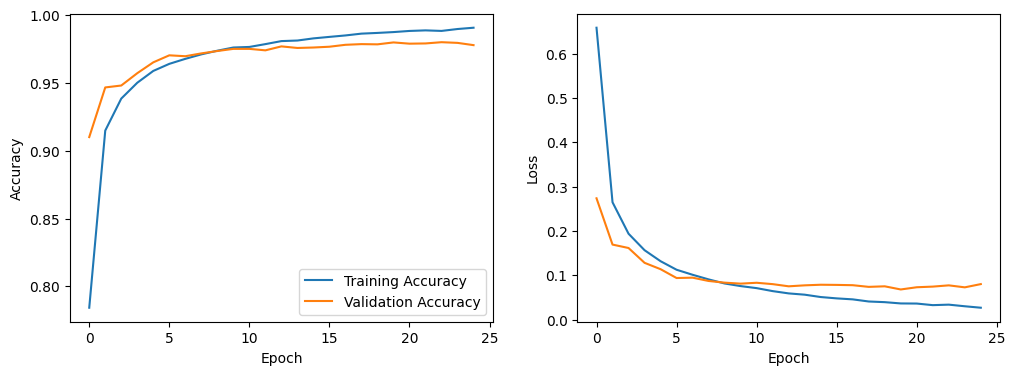

In [24]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


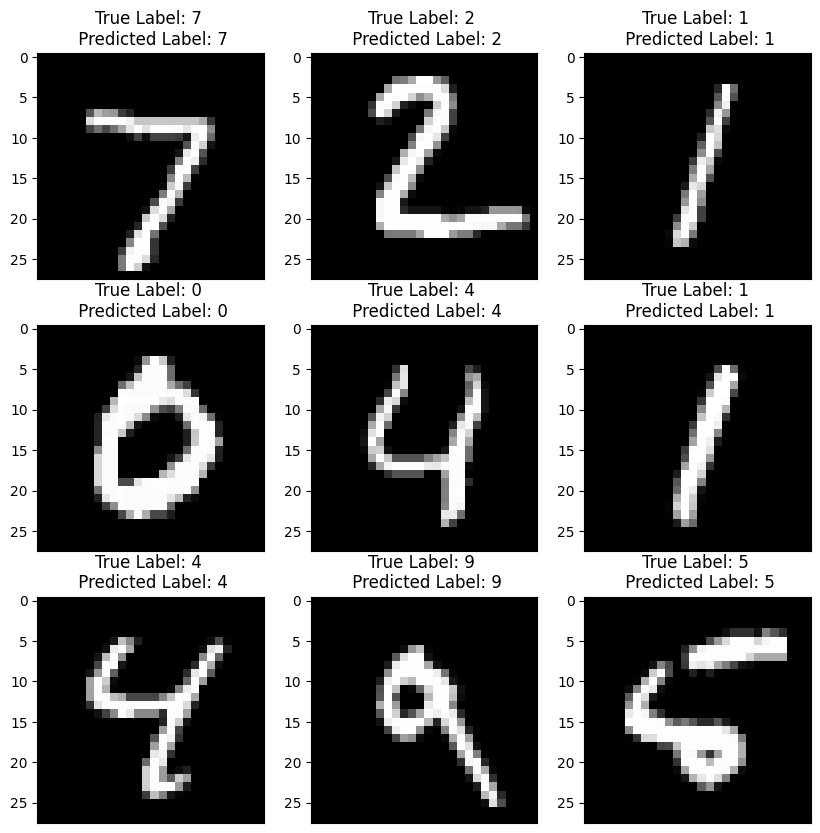

In [25]:
# Plot the Input, True Label, and Predicted Label
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i] , cmap = "gray")
  plt.title(f"True Label: {np.argmax(y_test[i])} \n Predicted Label: {np.argmax(model.predict(x_test[i].reshape(1,28,28)))}")
  plt.xticks([])

In [26]:
# making the same model with a kernel size = 3

In [27]:
model = Sequential()

model.add(Reshape((28,28,1) , input_shape = (28,28)))

model.add(ConvLSTM1D(
    filters=32,
    kernel_size=3,
    padding='same',
    return_sequences=False,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(64 , activation = "relu"))
model.add(Dense(10 , activation = "softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)      │ (None, 28, 32)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,858 (276.79 KB)

 Trainable params: 70,858 (276.79 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [29]:
early_stopping = EarlyStopping(monitor="val_loss" , patience=5 , restore_best_weights=True)

In [30]:
history  = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.6652 - loss: 0.9764 - val_accuracy: 0.9356 - val_loss: 0.2075
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9267 - loss: 0.2276 - val_accuracy: 0.9605 - val_loss: 0.1344
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9505 - loss: 0.1511 - val_accuracy: 0.9734 - val_loss: 0.0874
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9635 - loss: 0.1130 - val_accuracy: 0.9740 - val_loss: 0.0838
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9691 - loss: 0.0944 - val_accuracy: 0.9787 - val_loss: 0.0682
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9763 - loss: 0.0774 - val_accuracy: 0.9837 - val_loss: 0.0580
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9794 - loss: 0.0650 - val_accuracy: 0.9846 - val_loss: 0.0511
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9820 - loss: 0.0553 - 

In [36]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9872 - loss: 0.0411


[0.03696449473500252, 0.9890999794006348]

Text(0, 0.5, 'Loss')

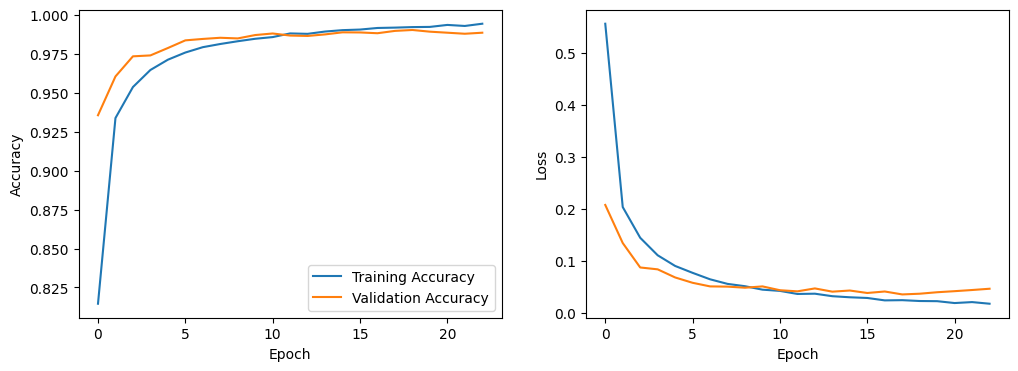

In [34]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


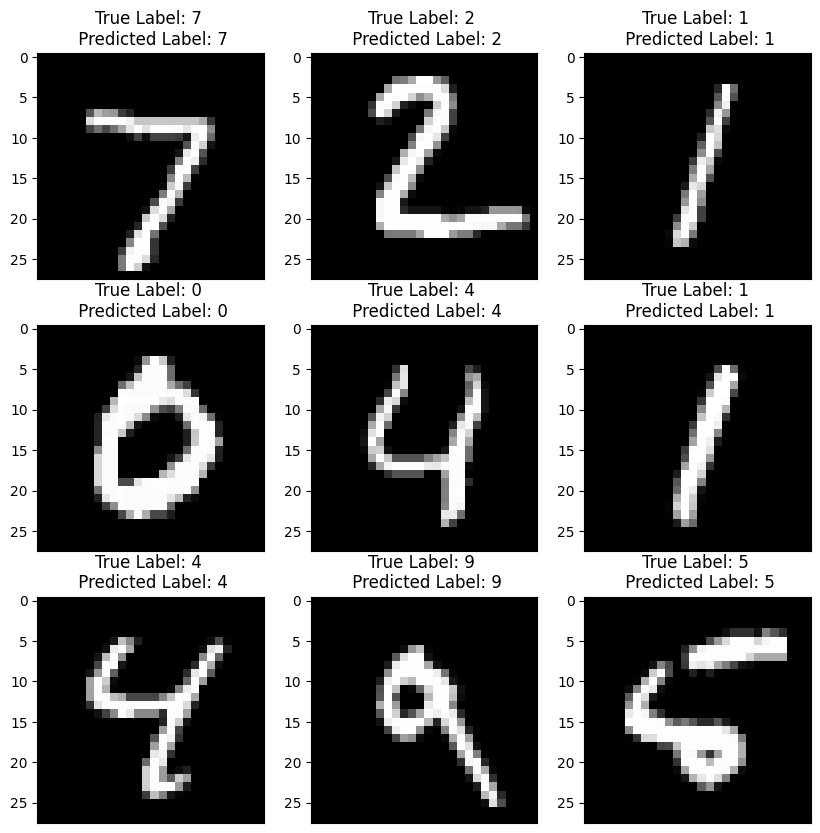

In [35]:
# Plot the Input, True Label, and Predicted Label
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i] , cmap = "gray")
  plt.title(f"True Label: {np.argmax(y_test[i])} \n Predicted Label: {np.argmax(model.predict(x_test[i].reshape(1,28,28)))}")
  plt.xticks([])

<b> There is no a big difference between using kernel > 1 and kernal 3 in this data but i thing in a bigger dataset it will be effective <B>

In [37]:
# let's try the padding will make it valid and look at the results

In [44]:
model = Sequential()

model.add(Reshape((28,28,1) , input_shape = (28,28)))

model.add(ConvLSTM1D(
    filters=32,
    kernel_size=1,
    padding='valid',
    return_sequences=False,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(64 , activation = "relu"))
model.add(Dense(10 , activation = "softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_4 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_2 (ConvLSTM1D)      │ (None, 28, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,410 (243.79 KB)

 Trainable params: 62,410 (243.79 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [46]:
early_stopping = EarlyStopping(monitor="val_loss" , patience=5 , restore_best_weights=True)

In [47]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.5863 - loss: 1.2204 - val_accuracy: 0.8986 - val_loss: 0.3058
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8982 - loss: 0.3156 - val_accuracy: 0.9345 - val_loss: 0.2004
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9328 - loss: 0.2119 - val_accuracy: 0.9557 - val_loss: 0.1427
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9488 - loss: 0.1608 - val_accuracy: 0.9669 - val_loss: 0.1074
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9588 - loss: 0.1329 - val_accuracy: 0.9659 - val_loss: 0.1130
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9637 - loss: 0.1155 - val_accuracy: 0.9670 - val_loss: 0.1012
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9666 - loss: 0.1024 - val_accuracy: 0.9719 - val_loss: 0.0916
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9715 - loss: 0.0897 - 

In [48]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9772 - loss: 0.0919


[0.06899358332157135, 0.9815000295639038]

In [49]:
# trying the valid with kernel > 3

In [50]:
model = Sequential()

model.add(Reshape((28,28,1) , input_shape = (28,28)))

model.add(ConvLSTM1D(
    filters=32,
    kernel_size=3,
    padding='valid',
    return_sequences=False,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(64 , activation = "relu"))
model.add(Dense(10 , activation = "softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_5 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_3 (ConvLSTM1D)      │ (None, 26, 32)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,762 (260.79 KB)

 Trainable params: 66,762 (260.79 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [52]:
early_stopping = EarlyStopping(monitor="val_loss" , patience=5 , restore_best_weights=True)

In [53]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.6685 - loss: 0.9864 - val_accuracy: 0.9283 - val_loss: 0.2202
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9205 - loss: 0.2506 - val_accuracy: 0.9590 - val_loss: 0.1299
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9496 - loss: 0.1624 - val_accuracy: 0.9685 - val_loss: 0.1023
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9649 - loss: 0.1140 - val_accuracy: 0.9779 - val_loss: 0.0726
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9696 - loss: 0.0949 - val_accuracy: 0.9793 - val_loss: 0.0712
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9740 - loss: 0.0813 - val_accuracy: 0.9821 - val_loss: 0.0610
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9780 - loss: 0.0687 - val_accuracy: 0.9796 - val_loss: 0.0699
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9813 - loss: 0.0577 - 

In [54]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9859 - loss: 0.0475


[0.035893701016902924, 0.9890999794006348]

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$